In [126]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [127]:
# Create our data.

X_train = np.array([[0, 0],  # Class 1.
                   [0, 10],  # Class 2.
                   [10, 10], # Class 3.
                   [10, 0],  # Class 4.
                   [0, 1],   # etc. basically in corners.
                   [1, 1],
                   [0.5, 0.9],
                   [3.1, 3.7],
                   [3, 2],
                   [1, 7],
                   [2, 9],
                   [2.5, 8.6],
                   [3.5, 7.9],
                   [9, 9],
                   [8, 9],
                   [8.5, 8.5],
                   [7.9, 9.3],
                   [9, 1],
                   [8.5, 2],
                   [7.9, 3],
                   [7.5, 1.9]]) 

y_train = np.array([0, 1, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])

In [128]:
# Visualize the data.

print(f"unique classes {np.unique(y_train)}")
print(f"class representation {y_train[:10]}")
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [0 1 2 3 0 0 0 0 0 1]
shape of X_train: (21, 2), shape of y_train: (21,)


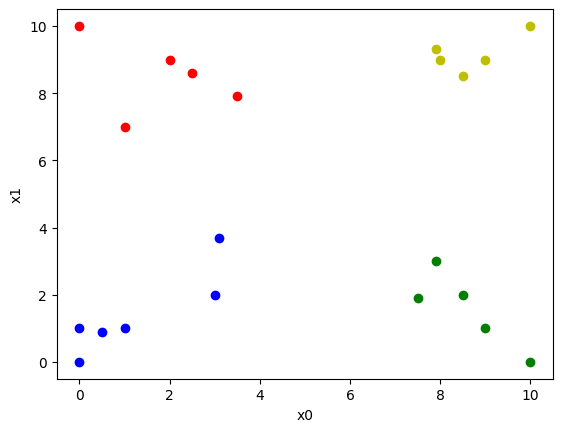

In [129]:
# Plot all the data.

class0 = X_train[y_train == 0]
class1 = X_train[y_train == 1]
class2 = X_train[y_train == 2]
class3 = X_train[y_train == 3]

plt.scatter(class0[:, 0], class0[:, 1], c='b', marker='o')
plt.scatter(class1[:, 0], class1[:, 1], c='r', marker='o')
plt.scatter(class2[:, 0], class2[:, 1], c='y', marker='o')
plt.scatter(class3[:, 0], class3[:, 1], c='g', marker='o')

plt.xlabel('x0')
plt.ylabel('x1')

plt.show()

In [130]:
# Construct the neural network.
# Notice 'linear' as activation for output layer.
# Linear output layer combined with 'from_logits=True' in loss function gives much better results,
# when training for multiclass classification.

model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 2)                 6         
                                                                 
 L2 (Dense)                  (None, 4)                 12        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [131]:
# Specify loss function.
# For multiclasss classification we use 'SparseCategoricalCrossentropy'.
# Instead of regression algorithm we specify 'Adam' algorithm which can modify learning late alpha on the go.

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.1),
)

In [132]:
# Train the model.

model.fit(
    X_train,y_train,
    epochs=500
)

Epoch 1/500
1/1 [==============================] - 0s 143ms/step - loss: 5.9660
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 4.0214
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 2.4968
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 1.6269
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 1.2797
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 1.0801
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 0.9305
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.8108
Epoch 9/500
1/1 [==============================] - 0s 1000us/step - loss: 0.7306
Epoch 10/500
1/1 [==============================] - 0s 999us/step - loss: 0.7012
Epoch 11/500
1/1 [==============================] - 0s 1000us/step - loss: 0.7088
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 0.6605
Epoch 13/500
1/1 [==============================] -

Epoch 104/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 105/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 106/500
1/1 [==============================] - 0s 999us/step - loss: 0.0111
Epoch 107/500
1/1 [==============================] - 0s 1000us/step - loss: 0.0109
Epoch 108/500
1/1 [==============================] - 0s 1000us/step - loss: 0.0108
Epoch 109/500
1/1 [==============================] - 0s 1000us/step - loss: 0.0107
Epoch 110/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 111/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 112/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 113/500
1/1 [==============================] - 0s 1000us/step - loss: 0.0102
Epoch 114/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 115/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 116/500
1/1 [=======

1/1 [==============================] - 0s 1000us/step - loss: 0.0048
Epoch 206/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 207/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 208/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 209/500
1/1 [==============================] - 0s 999us/step - loss: 0.0047
Epoch 210/500
1/1 [==============================] - 0s 1000us/step - loss: 0.0047
Epoch 211/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 212/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 213/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 214/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 215/500
1/1 [==============================] - 0s 1000us/step - loss: 0.0045
Epoch 216/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 217/500
1/1 [========================

1/1 [==============================] - 0s 1000us/step - loss: 0.0027
Epoch 308/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 309/500
1/1 [==============================] - 0s 1000us/step - loss: 0.0027
Epoch 310/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 311/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 312/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 313/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 314/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 315/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 316/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 317/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 318/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 319/500
1/1 [=============================

Epoch 409/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 410/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 411/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 412/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 413/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 414/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 415/500
1/1 [==============================] - 0s 1000us/step - loss: 0.0017
Epoch 416/500
1/1 [==============================] - 0s 1000us/step - loss: 0.0017
Epoch 417/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 418/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 419/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 420/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 421/500
1/1 [===============

450/450 [==============================] - 0s 288us/step


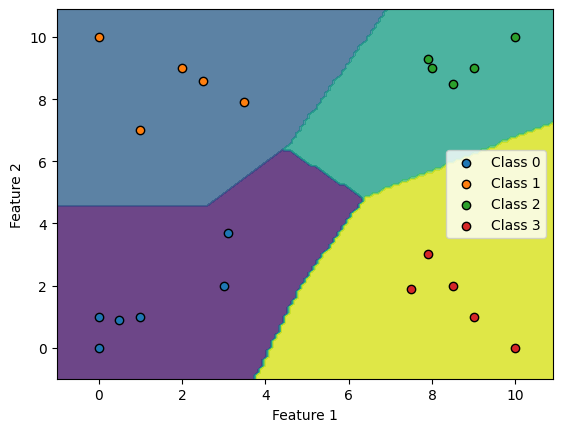

In [133]:
# Plot decision boundaries.

# Create meshgrid.

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the meshgrid.

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = model.predict(grid_points)
grid_predictions_mostProbableClass = np.argmax(grid_predictions, axis=1)

# Reshape to fit the meshgrid.

grid_predictions = grid_predictions_mostProbableClass.reshape(xx.shape)

# Contour plot.

plt.contourf(xx, yy, grid_predictions, alpha=0.8)

# Scatter plot.

unique_classes = np.unique(y_train)
for i, cls in enumerate(unique_classes):
    plt.scatter(X_train[y_train == cls, 0], X_train[y_train == cls, 1], label=f'Class {cls}', edgecolors='black')
    
# Add lables.
    
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Draw.

plt.show()

In [118]:
# Predict training data.

predictions = model.predict(X_train)

for i in range(predictions.shape[0]):
    print(f'to predict: {X_train[i]}, prediction: {np.argmax(predictions[i])}')

1/1 [==============================] - 0s 18ms/step
to predict: [0. 0.], prediction: 0
to predict: [ 0. 10.], prediction: 1
to predict: [10. 10.], prediction: 2
to predict: [10.  0.], prediction: 3
to predict: [0. 1.], prediction: 0
to predict: [1. 1.], prediction: 0
to predict: [0.5 0.9], prediction: 0
to predict: [3.1 3.7], prediction: 0
to predict: [3. 2.], prediction: 0
to predict: [1. 7.], prediction: 0
to predict: [2. 9.], prediction: 1
to predict: [2.5 8.6], prediction: 1
to predict: [3.5 7.9], prediction: 1
to predict: [9. 9.], prediction: 2
to predict: [8. 9.], prediction: 2
to predict: [8.5 8.5], prediction: 2
to predict: [7.9 9.3], prediction: 2
to predict: [9. 1.], prediction: 3
to predict: [8.5 2. ], prediction: 3
to predict: [7.9 3. ], prediction: 3
to predict: [7.5 1.9], prediction: 3


In [137]:
# Predict new data.

toPredict = np.array([[8.5, 6.5], [2.5, 9], [10, 2.5], [3, 3]])

predictions = model.predict(toPredict)

print(f'{np.argmax(predictions, axis=1)}')

1/1 [==============================] - 0s 9ms/step
[2 1 3 0]


In [ ]:
# Nice.